In [1]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from pylab import cm
import json

import os
import sys
import re

import matplotlib.patches as patches
from matplotlib import colors as m2colors

import plotly
import plotly.graph_objects as go

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

print(plotly.__version__)
print(matplotlib.__version__)
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

4.13.0
3.3.2


In [ ]:
# ## testing LHS
# test = lhs(4,10)
# rang = np.array([100,800])

# print(test)

# print(test[:,0] * np.diff(rang) + np.amin(rang))

{'tau': 0.98, 'tau_F': 4.9, 'tau_SG': 367, 'tau_SR': 367, 'm0': 5.4, 'x0': 0.3, 'a0': 0.8, 'a_max': 50, 'n': 3.5, 'resolution': 1.0, 'type': 'stiff', 'color': None, 'input_m': [], 'tau_R0': 200, 'TV0SR': 0.05, 'TV0SG': 2.8, 'dynamics': 'exp_dynamicTS'}
--------
a_c = 1.073531, x_c = 0.845405, m_c in absolute = 3.523469
exp_dynamicTS
priming times [320.38882138517624]
memory times [480.58323208]
mechanical ratios [1.48148148]
timesteps per region: [ 24 108 212 480]
regions: [3 1 2 5]
108.13122721749697
*********************
--------
a_c = 1.073531, x_c = 0.845405, m_c in absolute = 3.523469
exp_dynamicTS


/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


priming times [168.28426395939087]
memory times [15.02538071]
mechanical ratios [1.42592593]
timesteps per region: [ 24 108  60  15   1 384]
regions: [3 1 2 5 4 3]
108.18274111675126
profiles_exp_dynamicTS_perm_mem_v2.png
PD_profiles_exp_dynamicTS_perm_mem_v2.png


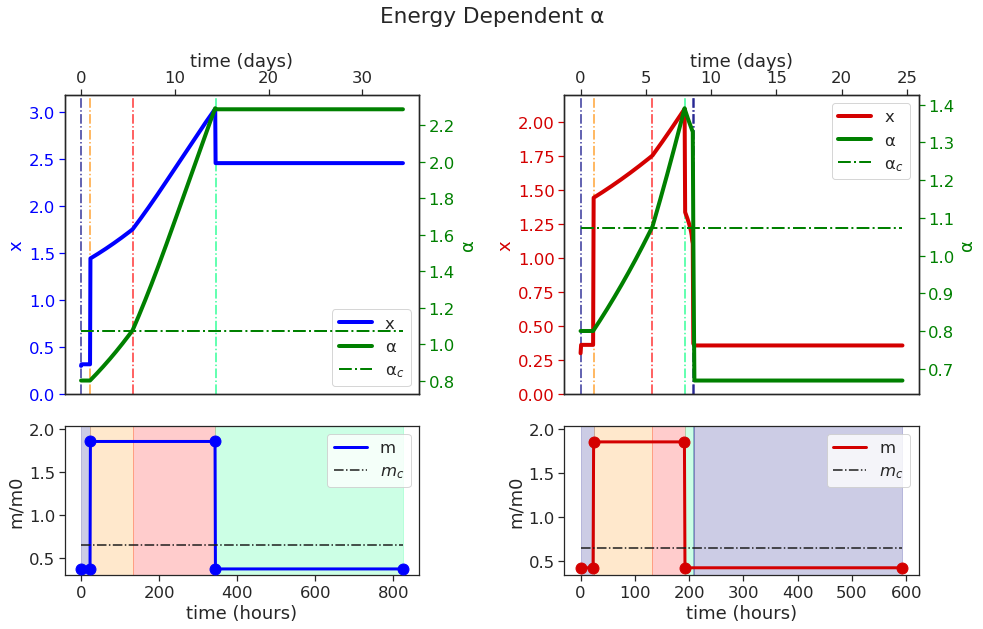

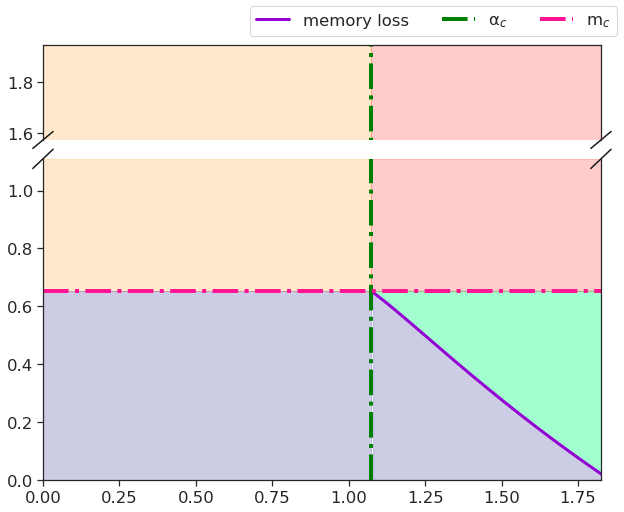

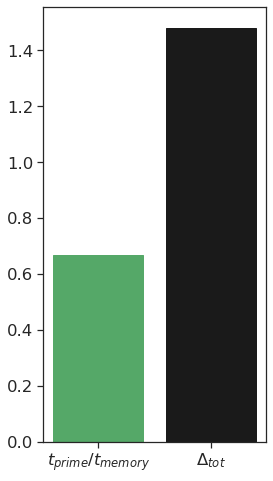

In [130]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
        params['tau'] = .98
        params['tau_F'] = params['tau'] * 5 # params['tau'] * 2
        params['tau_SG'] = 367 #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']

        params['m0'] = 5.4
        params['x0'] = 0.3
        params['a0'] = .8
        params['a_max'] = 50
        params['n'] = 3.5
        params['resolution'] = 1.
        params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []

        params['tau_R0'] = 200 # params['tau_SG'] #* 2
        params['TV0SR'] = 0.05
        params['TV0SG'] = 2.8
        
        params['dynamics'] = 'exp_dynamicTS'
    
    return params

ins = np.array(
    [
        [24, 2.],
        [320, 10.],
        [480, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])
print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .5]})
fig.suptitle('Energy Dependent \u03b1')

if 6 in pd.unique(resultsDF['active_region']) or 5 in pd.unique(resultsDF['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
#     params['color'] = (212/255, 0., 0.)
elif 4 in pd.unique(resultsDF2['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)

params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])

params['input_m'].append(ins.tolist())

fig3, ax3 = plt.subplots(1,1,figsize=(fig.get_size_inches()[0] - fig2.get_size_inches()[0], fig2.get_size_inches()[1]))
labels = ['${t_{prime}}/{t_{memory}}$', '$\Delta_{tot}$']
if np.amax(memory_times > 0):
    barlist = ax3.bar(labels, [np.mean(priming_times / memory_times), mech_stats])
    barlist[0].set_color('g')
    barlist[1].set_color('k')

print ('*********************')

params = set_params()

ins = np.array(
    [
        [24, 2.3],
        [168, 10.],
        [400, 2.3],
    ]
        )

resultsDF2, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF2)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['input_m'].append(ins.tolist())

if 6 in pd.unique(resultsDF2['active_region']) or 5 in pd.unique(resultsDF2['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
elif 4 in pd.unique(resultsDF2['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)   

params['color'] = (212/255, 0., 0.)
params, fig, _, _ = plot_profile(fig, ax[:,1], resultsDF2, params, colors = 
                                 [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                  mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']], plot_PD = False)

for ai, aa in enumerate(axs):
    _,_,_,_ = add_m_traj(aa, resultsDF2['alpha_prof'].values, 
                         resultsDF2['m_profile'].values, resultsDF2['t_space'].values, params)
    
# plt.plot(np.arange(len(deltaVlist)), deltaVlist)

# print([type(i) for i in params.values()])
# print([i for i in params.values()])

saveall = True
if saveall:
    direc = os.getcwd() + '/figures/figure4_dynamics_profiles/'
#     direc = os.getcwd() + '/figures/figure6_exp_fits/'

    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem_v2.png"
#     fname1 = "anseth_match_NN_v1.png"
    print(fname1)
    fig.savefig(direc + fname1, format='png', dpi=600)
    
#     fname2 = direc + "PD_perm_mem_v1.png"
    fname2 = 'PD_' + fname1
    print(fname2)
    fig2.savefig(direc + fname2, format='png', dpi=600)
    
#     fname3 = direc + "barz_EnergyWell_stiff_v3.png"
#     print(fname3)
#     fig3.tight_layout()
#     fig3.savefig(fname3, format='png', dpi=600)
    
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


In [ ]:
# ## test cell for broken axis

# fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .75]})
# fig.suptitle('Energy \u03b1')

# params['color'] = mcolors['red']
# params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
#                                       [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
#                                            mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])

# params, fig, _, _ = plot_profile(fig, ax[:,1], resultsDF2, params, colors = 
#                                  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
#                                   mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']], plot_PD = False)
# params['color'] = mcolors['black']
# for ai, aa in enumerate(axs):
#     _,_,_,_ = add_m_traj(aa, resultsDF2['alpha_prof'].values, resultsDF2['m_profile'].values, resultsDF2['t_space'].values, params)

--------
a_c = 1.129942, x_c = 0.842011, m_c in absolute = 3.727046
exp_staticTS
priming times [240.06284367635507]
memory times [0.]
mechanical ratios [1.46252285]
timesteps per region: [ 120 1200 2500]
regions: [3 1 3]
240.06284367635507
*********************
--------
a_c = 1.129942, x_c = 0.842011, m_c in absolute = 3.727046
exp_staticTS
priming times [110.05071461502997]
memory times [0.]
mechanical ratios [1.46252285]
timesteps per region: [ 120  550 1500]
regions: [3 1 3]
110.05071461502997


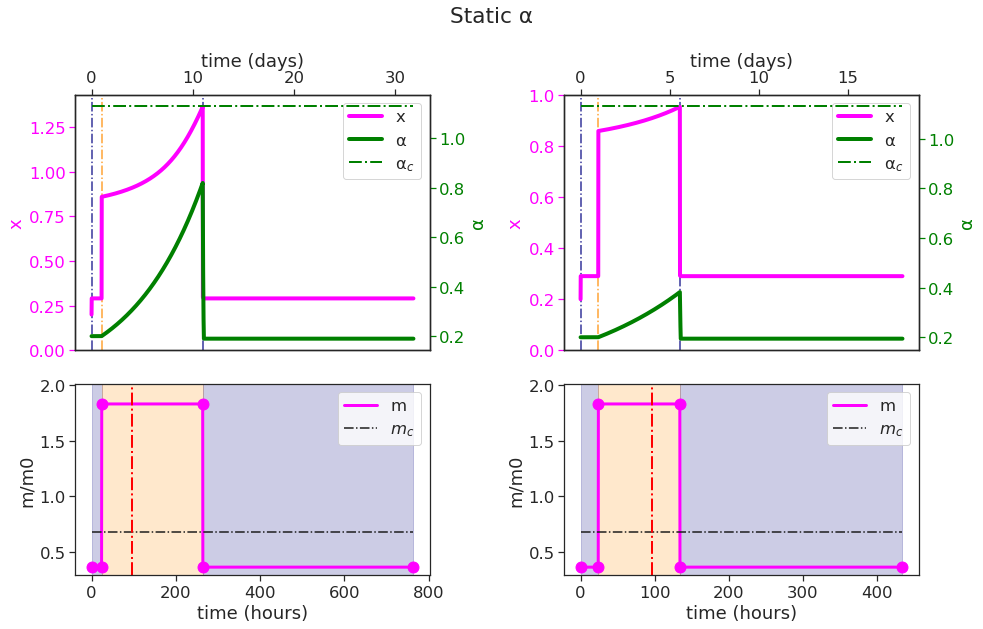

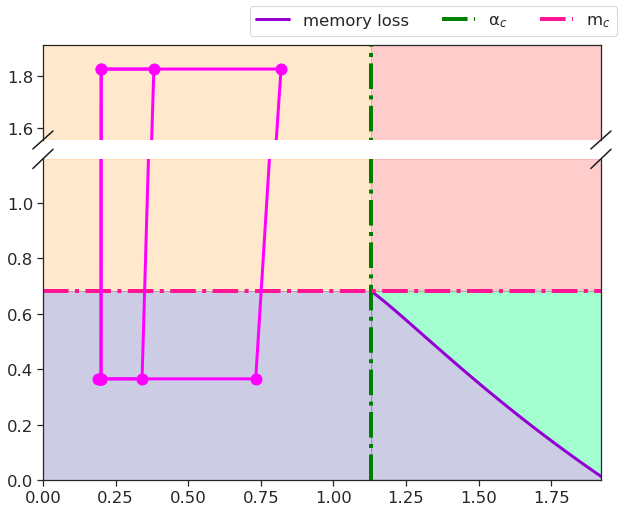

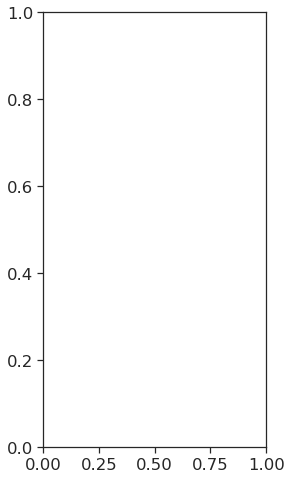

In [19]:
#### figure 4 stiff genes
#### integrate profile DOES NOT DEPEND ON WELL DEPTH
## setting time units to hours
params = {}
resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
        params['tau'] = .94
        params['tau_F'] = params['tau'] * 2 # params['tau'] * 2

        params['m0'] = 5.47
        params['x0'] = 0.2
        params['a0'] = 0.2
        params['a_max'] = 60.5
        params['n'] = 3.46
        params['resolution'] = 0.2
        params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []

        params['tau_SG'] = 170.1 # params['tau'] * 180
        params['tau_SR'] = 380.0 # params['tau_SG'] * 6
        
        params['dynamics'] = 'exp_staticTS'
    
    return params

params = set_params()
# 480 hours = 20 days
# time in hours | # stiffness
ins = np.array(
    [
        [24, 2.],
        [240, 10.],
        [500, 2.],    
    ]
        )

resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .5]})
fig.suptitle('Static \u03b1')

if 6 in pd.unique(resultsDF['active_region']) or 5 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
elif 4 in pd.unique(resultsDF2['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)

params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])

fig3, ax3 = plt.subplots(1,1,figsize=(fig.get_size_inches()[0] - fig2.get_size_inches()[0], fig2.get_size_inches()[1]))
labels = ['${t_{prime}}/{t_{memory}}$', '$\Delta_{tot}$']
if np.amax(memory_times > 0):
    barlist = ax3.bar(labels, [np.mean(priming_times / memory_times), mech_stats])
    barlist[0].set_color('g')
    barlist[1].set_color('k')

params['input_m'].append(ins.tolist())

print ('*********************')

params = set_params()

ins = np.array(
    [
        [24, 2],
        [110, 10],
        [300, 2],
    ]
        )

resultsDF2, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF2)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['input_m'].append(ins.tolist())

if 6 in pd.unique(resultsDF2['active_region']) or 5 in pd.unique(resultsDF2['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
elif 4 in pd.unique(resultsDF2['active_region']):
    #     print('red')
    params['color'] = (212/255, 0., 0.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)    

params, fig, _, _ = plot_profile(fig, ax[:,1], resultsDF2, params, colors = 
                                 [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                  mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']], plot_PD = False)

for ai, aa in enumerate(axs):
    _,_,_,_ = add_m_traj(aa, resultsDF2['alpha_prof'].values, 
                         resultsDF2['m_profile'].values, resultsDF2['t_space'].values, params)

# plt.plot(np.arange(len(deltaVlist)), deltaVlist)
saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure5_profile_NoEdependent/'

    fname1 = direc + "profiles_noEnergyWell_stiff_2panel_v2.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "PD_noEnergyWell_stiff_2panel_v2.png"
    print(fname2)
    fig2.savefig(fname2, format='png', dpi=600)
    
    fname3 = direc + "barz_noEnergyWell_stiff_v2.png"
    print(fname3)
    fig3.tight_layout()
    fig3.savefig(fname3, format='png', dpi=600)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


{'tau': 0.94, 'tau_F': 1.88, 'tau_SG': 170.1, 'tau_SR': 380.0, 'm0': 5.47, 'x0': 0.2, 'a0': 0.8, 'a_max': 60.5, 'n': 3.46, 'resolution': 0.4, 'type': 'stiff', 'color': None, 'input_m': [], 'dynamics': 'constant'}
--------
a_c = 1.129942, x_c = 0.842011, m_c in absolute = 3.727046
constant


/mnt/b/research/mechanical-memory/MMfxns.py:63: RuntimeWarning: invalid value encountered in power
  return ( f_m(m, params) - x/params['tau'] + alpha * x**params['n']/(x**params['n']+1) )


priming times [96.09151572926596]
memory times [0.]
mechanical ratios [1.46252285]
[240.92965908637453, 397.91566944931776]
timesteps per region: [ 60 141  99   2 748]
regions: [3 1 2 4 3]
56.45376549094375
2.352240228789323
*********************
profiles_constant_stiff_nomem.png
PD_profiles_constant_stiff_nomem.png


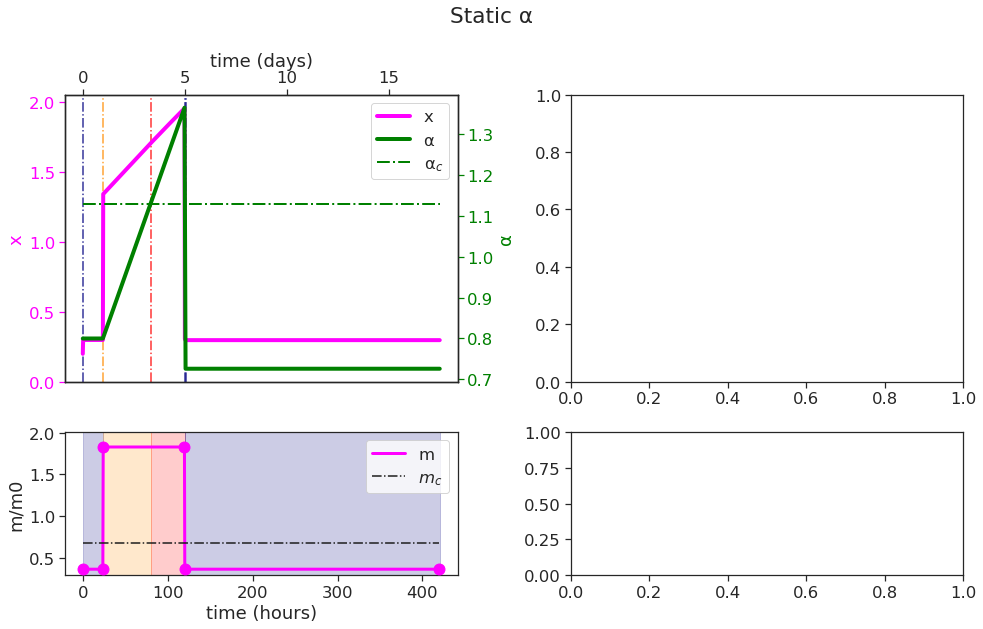

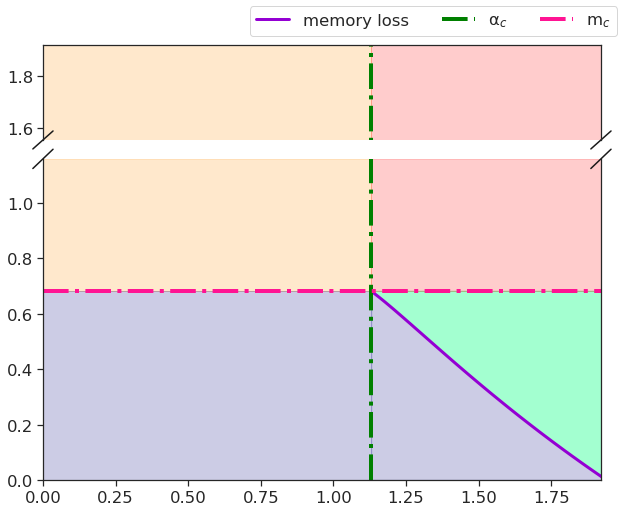

In [108]:
#### figure 4 stiff genes
#### integrate profile constant
## setting time units to hours
params = {}
resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
        params['tau'] = 0.94
        params['tau_F'] = params['tau'] * 2
        params['tau_SG'] = 170.1 # params['tau'] * 180
        params['tau_SR'] = 380.0 # params['tau_SG'] * 6

        params['m0'] = 5.47
        params['x0'] = 0.2
        params['a0'] = 0.8
        params['a_max'] = 60.5
        params['n'] = 3.46
        params['resolution'] = 0.4 # 0.05
        params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
#         params['tau_SG'] = 120.0 # params['tau'] * 180
#         params['tau_SR'] = 720.0 # params['tau_SG'] * 6
        params['dynamics'] = 'constant'
    
    return params

params = set_params()

# 480 hours = 20 days
# time in hours | # stiffness
ins = np.array(
    [
        [24, 2.],
        [96, 10.],
        [300, 2.],    
    ]
        )
print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)
mech_stats = np.abs(stiffP - stiffA) / params['m0']

print(params['t_prime'])

fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .5]})
fig.suptitle('Static \u03b1')

if 6 in pd.unique(resultsDF['active_region']) or 5 in pd.unique(resultsDF['active_region']):
#     print('blue')
    params['color'] = (0., 0., 1.)
elif 4 in pd.unique(resultsDF2['active_region']):
    #     print('red')
    params['color'] = (212/255, 0., 0.)
else:
#     print('pink')
    params['color'] = (1., 0., 1.)

params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])
params['input_m'].append(ins.tolist())
print(params['time_to_AC']/24)

print ('*********************')

# params = set_params()

# ins = np.array(
#     [
#         [24, 2],
#         [110, 10],
#         [300, 2],
#     ]
#         )

# resultsDF2, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF2)
# mech_stats = np.abs(stiffP - stiffA) / params['m0']

# params['input_m'].append(ins.tolist())

# if 6 in pd.unique(resultsDF2['active_region']) or 5 in pd.unique(resultsDF2['active_region']):
# #     print('red')
#     params['color'] = (212/255, 0., 0.)
# elif 4 in pd.unique(resultsDF2['active_region']):
# #     print('blue')
#     params['color'] = (0., 0., 1.)
# else:
# #     print('pink')
#     params['color'] = (1., 0., 1.)    

# params, fig, _, _ = plot_profile(fig, ax[:,1], resultsDF2, params, colors = 
#                                  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
#                                   mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']], plot_PD = False)

# for ai, aa in enumerate(axs):
#     _,_,_,_ = add_m_traj(aa, resultsDF2['alpha_prof'].values, 
#                          resultsDF2['m_profile'].values, resultsDF2['t_space'].values, params)

# # plt.plot(np.arange(len(deltaVlist)), deltaVlist)
saveall = True
if saveall:
    direc = os.getcwd() + '/figures/figure4_dynamics_profiles/'

    fname1 = 'profiles_' + params['dynamics'] + '_stiff_nomem.png'
    print(fname1)
    fig.savefig(direc + fname1, format='png', dpi=600)
    
    fname2 = 'PD_' + fname1
    print(fname2)
    fig2.savefig(direc + fname2, format='png', dpi=600)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


0.9387858525796198
0.7509183417816624
2.252755025344987


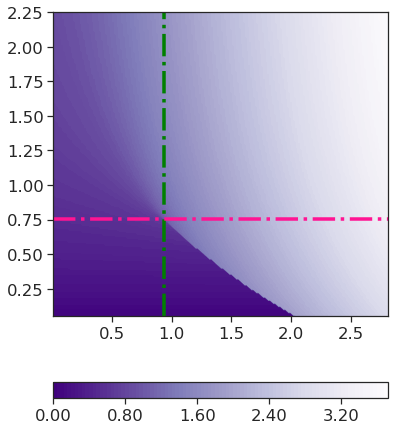

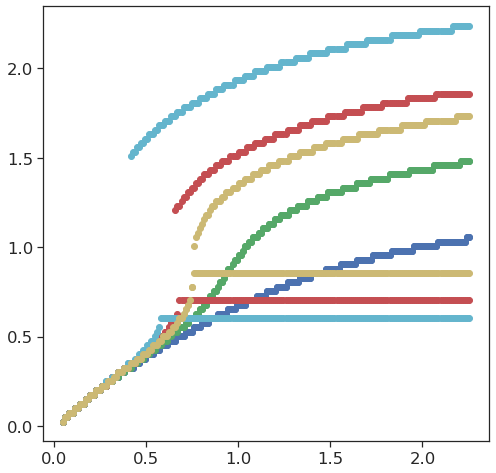

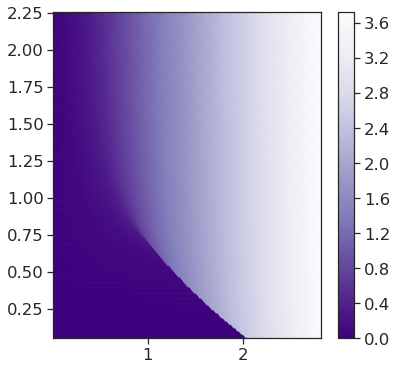

In [21]:
#### figure 4 heat map of equilibrium value of x

params = {}
resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
        params['tau'] = 1. # for the equation
        params['tau_F'] = 1. # for alpha
        params['tau_SG'] = 170.1 # params['tau'] * 180
        params['tau_SR'] = 380.0 # params['tau_SG'] * 6

        params['m0'] = 1.
        params['x0'] = 0.2
        params['a0'] = 0.8
        params['a_max'] = 2.5
        params['n'] = 4.
        params['resolution'] = 0.4 # 0.05
        params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
#         params['tau_SG'] = 120.0 # params['tau'] * 180
#         params['tau_SR'] = 720.0 # params['tau_SG'] * 6
        params['dynamics'] = 'constant'
    
    return params

params = set_params()

x_c = x_crit(params['n'])
a_c = alpha_crit(params['n'], params['tau'])
params['x_c'] = x_c; params['a_c'] = a_c;
print(a_c)


# a_space, mtst = calc_PD(params)
# print(a_space)
# print(mtst)

m_c = scipy.optimize.fsolve(m_crit_general, 0.5, args=(params), xtol=1e-10)[0] / params['m0']
params['m_c'] = m_c
print(m_c)

Ndim = 200
x_space = np.linspace(0, 5., Ndim)
m_space = np.linspace(0.05,params['m_c']*3,Ndim) * params['m0']
a_space = np.linspace(0.01, params['a_c']*3, Ndim)
print(np.amax(m_space))
a_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space - a_c)))[0]

U_data = np.zeros((len(x_space), len(a_space), len(m_space)))
for mi, mm in enumerate(m_space):
    for ai, aa in enumerate(a_space):
        for xi, xx in enumerate(x_space):
            U_data[xi, ai, mi] = U(f_m, mm, xx, aa, params)

x_arr_max = np.zeros((Ndim,Ndim))
x_arr_min = np.zeros((Ndim,Ndim))
m0coords = []; m1coords = []; m2coords = []
for mi, mm in enumerate(m_space):
    for ai, aa in enumerate(a_space):
        xargs = find_peaks(-np.abs(np.diff(U_data[:,ai,mi])))[0]
        Utest = U_data[xargs,ai,mi]        
        xmins = x_space[xargs]
        
        if len(xmins) > 0:
            x_arr_max[mi, ai] = xmins[np.argmin(Utest)]
            x_arr_min[mi, ai] = np.amin(xmins) # xmins[np.argmin(Utest)]
        else:
            try:
                x_arr_max[mi, ai] = np.amax(xmins)
#                 x_arr_min[mi, ai] = np.amin(xmins)
            except:
                x_arr_max[mi, ai] = 0.
#                 x_arr_min[mi, ai] = 0.

fig, ax = plt.subplots(1,1, figsize=(6,8))

## absolute m
# cf = ax.contourf(a_space, m_space, x_arr, levels=100, cmap=cm.Purples_r)
# ylims = ax.get_ylim()
# ax.plot([params['a_c'], params['a_c']],[np.amin(m_space), params['m_c']*params['m0']*2], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c']*params['m0'], params['m_c']*params['m0']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', lab

## m over m0
cf = ax.contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
ylims = ax.get_ylim()
ax.plot([params['a_c'], params['a_c']],[ylims[0], ylims[1]], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c'], params['m_c']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', label='m$_{c}$')

ax.set_ylim(ylims)

cb = plt.colorbar(cf, ax=ax, format='%.2f', orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

randcurves = np.floor(np.linspace(0, np.amax(a_space), 4))
randcurves = np.array([20,50,75,99])

fig3, ax3 = plt.subplots(1,1, figsize=(8,8))

colors = ['b','g','r','c','y','k']

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_max[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_max[:,a_ind], color=colors[di+1])

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_min[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_min[:,a_ind], color=colors[di+1])


plt.show()


fig2, ax2 = plt.subplots(1,1, figsize=(6,6))
baseline = f_m(m_space, params)
cf2 = ax2.contourf(a_space, m_space, x_arr_max - baseline[:,np.newaxis], levels=100, cmap=cm.Purples_r)
plt.colorbar(cf, ax=ax2)

saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure4_dynamics_profiles/'

    fname1 = direc + "x_overlay_phasediagram_values.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))


   Unnamed: 0       tau     tau_F      tau_SG      tau_SR        m0   x0   a0      a_max         n  resolution   type  t_prime  t1max      x_c       a_c       m_c        dt       ptime  mem_stiff  prime_stiff  mem_time  prime_time
0           0  0.743858  1.487717  528.375005  278.855753  4.074178  0.2  0.2  39.433618  4.836024         0.5  stiff      0.0    0.0  0.91689  1.065067  1.661773  0.500071  208.217373   3.636884    15.227721  0.500071  208.029656
80000
tau           -0.036406
tau_SG        -0.659283
tau_SR         0.111910
delta_prime    0.153388
delta_mem     -0.066239
delta_tot      0.122188
n             -0.003214
dtype: float64
['delta_prime' 'tau_SG']


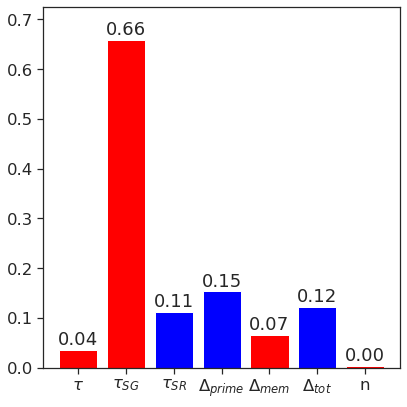

In [133]:
## figure 6
## data maps for parameters, static and Energy dependent.
## spearman correlation map
## heat map for priming time, memory time, distance from m_c.

# goal: assemble different inputs, get profiles, collocate summary_stats output, make a grid of the inputs and plot.
#(probably very sensitive)

direc = './stiff_results/staticTS/'
fname = 'static_LHS_SG_SR_ng'
# fname2 = 'static_LHS_SG_SR_n4'

allDF = pd.read_csv(direc + fname +'.csv')
# allDF2 = pd.read_csv(direc + fname2 +'.csv')
input_prof = np.load(direc + fname + '_inputs.npy', allow_pickle=True)
# input_prof2 = np.load(direc + fname2 + '_inputs.npy', allow_pickle=True)

# allDF = pd.concat((allDF, allDF2))

allDF = allDF.reset_index(drop=True)
print(allDF.head(1))
print(len(allDF))
# print(input_prof.shape)
# print(input_prof)
prettylabel = {
#                         'prime_time':'$t_{prime}$', 
                        'tau_SG':'${\\tau}_{SG}$', 
                        'tau_SR':'${\\tau}_{SR}$', 
                        # 'm0':'${m}_{0}$',
                        'tau':'${\\tau}$',
                        'delta_prime':'${\Delta}_{prime}$',
                        'delta_mem':'${\Delta}_{mem}$', 
                        'delta_tot':'${\Delta}_{tot}$',
                        'n':'n'
                        }

allDF['delta_prime'] = (allDF['prime_stiff'] - allDF['m_c'] * allDF['m0']) / allDF['m0']
allDF['delta_mem'] = (allDF['m_c'] * allDF['m0'] - allDF['mem_stiff']) / allDF['m0']
allDF['delta_tot'] = allDF['delta_prime'] + allDF['delta_mem']
allDF['tm_over_tp'] = allDF['mem_time'] / allDF['prime_time']

memDF = allDF.loc[allDF['mem_time'] > 0.].loc[allDF['mem_time'].notna()]

subcols = ['tau','tau_SG','tau_SR', 'delta_prime', 'delta_mem', 'delta_tot','n'] # 'm0','tau',
fig, ax = plt.subplots(1,1,figsize=(6, 6))

mem_corr = plot_memcorr(memDF, subcols, prettylabel, ax)
mem_corr = mem_corr.iloc[mem_corr.abs().argsort()]
heat_cols = mem_corr.index.values[-2:]
print(heat_cols)

heat_cols = ['delta_prime', 'tau_SG']
fig2 = plot_groupedDF_heatmap(memDF[subcols + ['tm_over_tp']], heat_cols, prettylabel, [None, [120, 400]])

fig2.show()

saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure6/'

    fname1 = direc + "staticNG_spearman_corrs_v1.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "static_heatmap_v1.png"
    fig2.write_image(fname2, scale = 1.5, engine='kaleido')
    

   Unnamed: 0  Unnamed: 0.1       tau     tau_F      tau_SG        m0   x0    a0  a_max        n  resolution   type      tau_R0     TV0SR     TV0SG  t_prime  t1max       x_c       a_c       m_c        dt      ptime  mem_stiff  prime_stiff  mem_time  prime_time
0           0             0  1.049554  2.099107  239.502821  4.813404  0.2  0.05   50.0  3.90814         0.5  stiff  239.502821  0.087846  1.013985      0.0    0.0  0.874659  0.912709  0.680782  0.500054  69.033229    1.67505     11.33083       0.0    69.00752
140000
tau           -0.214629
tau_R0        -0.514697
TV0SG          0.306290
TV0SR         -0.126484
delta_prime    0.116626
delta_mem      0.060681
delta_tot      0.156596
n              0.247744
dtype: float64
['TV0SG' 'tau_R0']


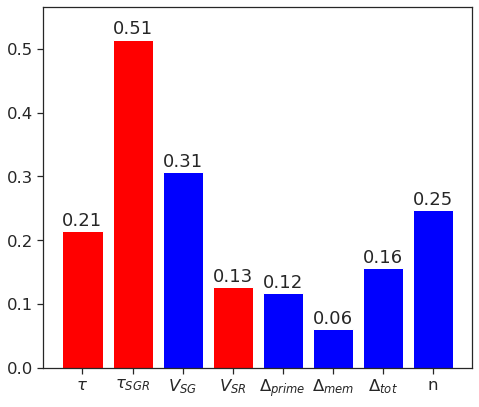

In [132]:
## figure 6
## data maps for parameters, Energy DEPENDENT

direc = './stiff_results/dynamicTS/'
# fname = 'energy_dependent_LHS_n3'
fname = 'energy_dependent_LHS_ng_all'
# fname2 = 'energy_dependent_LHS_ng2'
# fname2 = 'static_paramtest_SG_SR_tautest_n4'

allDF = pd.read_csv(direc + fname +'.csv')
# allDF2 = pd.read_csv(direc + fname2 +'.csv')
input_prof = np.load(direc + fname + '_inputs.npy', allow_pickle=True)
# input_prof2 = np.load(direc + fname2 + '_inputs.npy', allow_pickle=True)

# allDF = pd.concat((allDF, allDF2))
# input_prof = np.concatenate((input_prof, input_prof2))

allDF = allDF.reset_index(drop=True)
print(allDF.head(1))
print(len(allDF))

# allDF.to_csv('energy_dependent_LHS_ng_all'+'.csv')
# np.save('energy_dependent_LHS_ng_all'+'_inputs.npy', input_prof)

# sys.exit()


prettylabel = {
                        #'prime_time':'$t_{prime}$', 
                        'tau_R0':'${\\tau}_{SGR}$', 
                        'TV0SG':'${V}_{SG}$',
                        'TV0SR':'${V}_{SR}$',
                        'm0':'${m}_{0}$',
                        'tau':'${\\tau}$',
                        'delta_prime':'${\Delta}_{prime}$',
                        'delta_mem':'${\Delta}_{mem}$', 
                        'delta_tot':'${\Delta}_{tot}$',
                        'n':'n'
                        }

allDF['delta_prime'] = (allDF['prime_stiff'] - allDF['m_c'] * allDF['m0']) / allDF['m0']
allDF['delta_mem'] = (allDF['m_c'] * allDF['m0'] - allDF['mem_stiff']) / allDF['m0']
allDF['delta_tot'] = allDF['delta_prime'] + allDF['delta_mem']
allDF['tm_over_tp'] = allDF['mem_time'] / allDF['prime_time']

# allDF.to_csv('./stiff_results/energy_dependent_LHS_ng_addcols.csv')
# sys.exit()

memDF = allDF.loc[allDF['mem_time'] > 0.].loc[allDF['mem_time'].notna()]

# memDF[subcols].apply(lambda x: x - x.mean()/x.std(), axis=0)

subcols = ['tau', 'tau_R0', 'TV0SG', 'TV0SR', 'delta_prime', 'delta_mem', 'delta_tot', 'n'] # 'm0','tau',
# subcols = ['tau', 'tau_R0', 'TV0SG', 'TV0SR', 'delta_prime', 'delta_mem', 'delta_tot']

# memDF[subcols + ['tm_over_tp']] = memDF[subcols + ['tm_over_tp']].apply(lambda x: x - x.mean()/x.std(), axis=0)

fig, ax = plt.subplots(1,1,figsize=(7, 6))
mem_corr = plot_memcorr(memDF, subcols, prettylabel, ax)
mem_corr = mem_corr.iloc[mem_corr.abs().argsort()]
heat_cols = mem_corr.index.values[-2:]
print(heat_cols)

heat_cols = ['TV0SG', 'tau_R0']
fig2 = plot_groupedDF_heatmap(memDF[subcols + ['tm_over_tp']], heat_cols, prettylabel, [None, [150,700]])

plt.show()
fig2.show()

saveall = False
if saveall:
    direc = os.getcwd() + '/figures/figure6/'

    fname1 = direc + "energyNG_spearman_corrs_v2.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)
    
    fname2 = direc + "energyNG_heatmap_v2.png"
    fig2.write_image(fname2, scale = 1.5, engine='kaleido')

In [ ]:
## test cell for failures

failU = np.load('failureU2.npy', allow_pickle=True)

print(failU)

failU = failU[0:10000]

# print(failU[0:100])
fig, ax = plt.subplots(3, 1, figsize=(6,10))

ax[0].plot(np.arange(len(failU)-1), np.abs(np.diff(failU)))
ax[0].scatter(diff_algo, np.abs(np.diff(failU))[diff_algo])

print(argrelextrema(np.abs(np.diff(failU)), np.less)[0])
print(find_peaks(-np.abs(np.diff(failU)))[0])

diff_algo = find_peaks(-np.abs(np.diff(failU)))[0]
algo = find_peaks((-failU))[0]

ax[1].plot(np.arange(len(failU)), failU)
ax[1].scatter(diff_algo, failU[diff_algo])

ax[2].plot(np.arange(len(failU)), failU)
ax[2].scatter(algo, failU[algo])


params = {}
params['tau'] = 1.
params['m0'] = 6.
params['n'] = 3
params['type'] = 'stiff'

m = 3.
a = 1.192
xUd = np.linspace(0,3,int(1e6))

x_current = 0.73

U_data = U(f_m, m, xUd, a, params)

x_args = find_peaks(-np.abs(np.diff(U_data)))[0]
x_argmin = x_args[np.abs(xUd[x_args]-x_current) == np.amin(np.abs(xUd[x_args]-x_current))]

plt.plot(xUd, U_data)
plt.scatter(xUd[x_args], U_data[x_args])

In [ ]:
## test cell for broken axis

fig, ax = plt.subplots(2, 2, figsize=(14,9), gridspec_kw={'height_ratios': [1, .75]})
fig.suptitle('Static \u03b1')

params['color'] = mcolors['red']
params, fig, fig2, axs = plot_profile(fig, ax[:,0], resultsDF, params, colors = 
                                      [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                           mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']])

params, fig, _, _ = plot_profile(fig, ax[:,1], resultsDF2, params, colors = 
                                 [mcolors['darkorange'], mcolors['red'], mcolors['navy'], 
                                  mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']], plot_PD = False)
params['color'] = mcolors['black']
for ai, aa in enumerate(axs):
    _,_,_,_ = add_m_traj(aa, resultsDF2['alpha_prof'].values, resultsDF2['m_profile'].values, resultsDF2['t_space'].values, params)